#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/imdb_top_10000.txt", sep = '\t')
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [ ]:
df.isna().sum()

tt0111161                          0
The Shawshank Redemption (1994)    0
1994                               0
 9.2                               0
619479                             0
142 mins.                          0
Crime|Drama                        1
dtype: int64

In [ ]:
df = pd.read_csv("/content/imdb_top_10000.txt", sep = '\t', names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [ ]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [ ]:
df.shape

(10000, 7)

In [ ]:
df.dropna(subset = ['genres'], inplace = True)
df.isna().sum()


imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

In [ ]:
df.shape

(9999, 7)

In [ ]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

## 2. Asking Questions

Which movie has the highest score in the year 1999?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [ ]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [ ]:
dtypes: object
run_time = '142 mins'
number, text = run_time.split(' ')
split = int(number)
print(number)

142


In [ ]:
genre_set=set()
for genre in df.genres:
  list_genre = genre.split('|')
  genre_set.update(list_genre)

len(genre_set)

24

In [ ]:
for genre in genre_set:
  df[genre] = [genre in row.split('|') for row in df.genres]

In [ ]:
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

   Fantasy  Mystery  Musical  Animation  ...  Family  Adventure  Biography  \
0    False    False    False      False  ...   False      False      False   
1    False    False    False      False  ...   False      False      False   
2    False     True    False      False  ...   False      False      False   
3    False    False    False      False  ...   False       True      False   
4    False    False    False      False  ...   False       True      False   

   Crime  Film-Noir  Sci-Fi  Comedy  Music  Adult  Drama  
0   True      False   False   False  False  False   True  
1   True      False   False   False  False  False  False  
2  False      False   False   False  False  False   True  
3  False      False    True   False  False  False  False  
4  False      False    True   False  False  False  False  

[5 rows x 30 columns]

## 4. EDA

## 5. Determining Best Movies

In [ ]:
best_movie = df.groupby('year', sort = False)
year_1999 = best_movie.get_group(1999)
best_movie = year_1999[year_1999['score']==year_1999.score.max()]
best_movie['title']


2    Fight Club (1999)
Name: title, dtype: object

## 6. Trends in Popularity of Genres

In [ ]:
genredf = df[list(genre_set)]
genredf.head()

Fantasy  Mystery  Musical  Animation  Horror   News    War  Western  \
0    False    False    False      False   False  False  False    False   
1    False    False    False      False   False  False  False    False   
2    False     True    False      False   False  False  False    False   
3    False    False    False      False   False  False  False    False   
4    False    False    False      False   False  False  False    False   

   Thriller  History  ...  Family  Adventure  Biography  Crime  Film-Noir  \
0     False    False  ...   False      False      False   True      False   
1      True    False  ...   False      False      False   True      False   
2      True    False  ...   False      False      False  False      False   
3     False    False  ...   False       True      False  False      False   
4      True    False  ...   False       True      False  False      False   

   Sci-Fi  Comedy  Music  Adult  Drama  
0   False   False  False  False   True  
1   False   False  False  False  False  
2   False   False  False  False   True  
3    True   False  False  False  False  
4    True   False  False  False  False  

[5 rows x 24 columns]

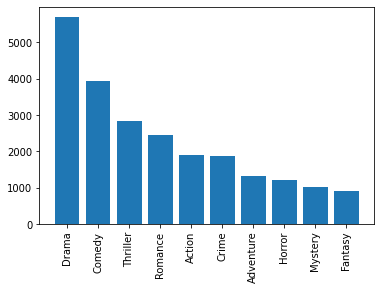

In [ ]:
y = genredf.sum().sort_values(ascending=False)[:10]
x= y.index
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()